42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
📈 Classification Report:
              precision    recall  f1-score   support

       angry       0.99      0.99      0.99       269
     anxious       1.00      0.90      0.95       101
       happy       1.00      0.98      0.99       435
         sad       0.95      1.00      0.97       331
    surprise       0.99      0.98      0.98       184

    accuracy                           0.98      1320
   macro avg       0.98      0.97      0.98      1320
weighted avg       0.98      0.98      0.98      1320



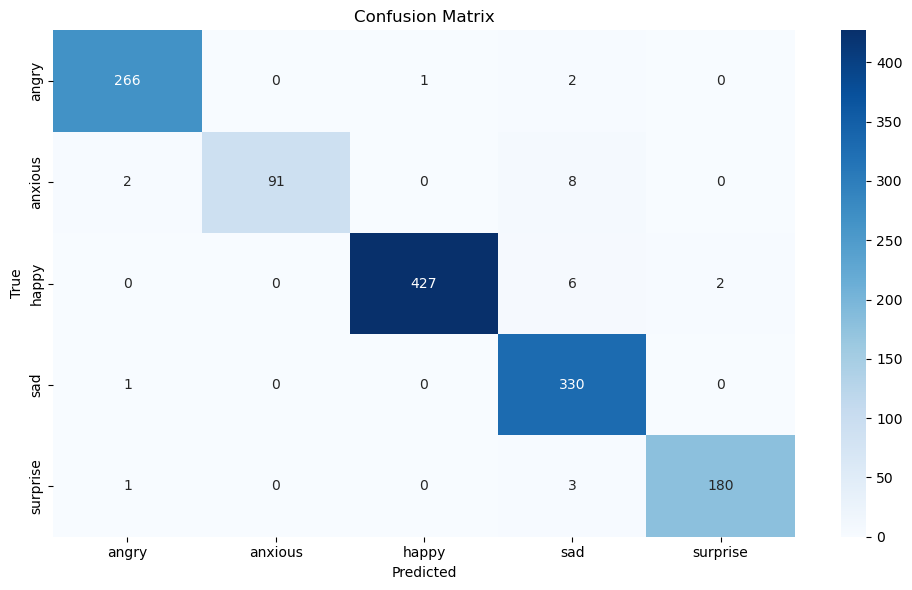


🎯 Model Accuracy: 98.03%


In [5]:
# 📦 Imports
import numpy as np
import joblib
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score

# 🧠 Load Resources
model = load_model("model.h5")
pca = joblib.load("pca.pkl")
labels = np.load("labels.npy")

# 📁 Load Collected Data
X = []
y_labels = []
label_dict = {}
label_counter = 0

for i in os.listdir("collected_data"):
    if i.endswith(".npy"):
        data = np.load(os.path.join("collected_data", i))
        base_label = i.split('.')[0].split('_')[0]

        if base_label not in label_dict:
            label_dict[base_label] = label_counter
            label_counter += 1

        label_index = label_dict[base_label]
        X.append(data)
        y_labels.extend([label_index] * data.shape[0])

X = np.vstack(X)
y = np.array(y_labels)

# ➕ One-hot encoding for comparison with model output
from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(y)

# 🔀 Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)
X_test_pca = pca.transform(X_test)

# 🔍 Predict
y_pred_prob = model.predict(X_test_pca)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# 📋 Classification Report
print("📈 Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels))

# 🔢 Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig("confusion_matrix.png")
plt.show()

# ✅ Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"\n🎯 Model Accuracy: {accuracy * 100:.2f}%")